In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
# Get underlying prices
spy = pd.read_csv("../data/raw/spy.csv", parse_dates=True, index_col=0)

In [3]:
# Get the working dataframe
ml_df = pd.read_csv("../data/processed/ml_df.csv", parse_dates=True, index_col=0)

In [4]:
ml_df

,QUOTE_DATE,EXPIRE_DATE,UNDERLYING_LAST,STRIKE,C_LAST,C_BID,C_ASK,C_IV,C_VOLUME,diff,diff_date
Date,,,,,,,,,,,
2018-01-02,2018-01-02,2018-01-24,268.81,269.0,1.56,1.72,1.76,0.07134,80.0,0.19,22
2018-01-03,2018-01-03,2018-01-24,270.47,270.0,2.15,2.10,2.15,0.07361,271.0,0.47,21
2018-01-04,2018-01-04,2018-01-24,271.56,272.0,1.67,1.57,1.61,0.06871,392.0,0.44,20
2018-01-05,2018-01-05,2018-01-26,273.41,273.0,2.21,2.23,2.28,0.07675,NaN,0.41,21
2018-01-08,2018-01-08,2018-01-31,273.94,274.0,2.08,2.07,2.09,0.07593,490.0,0.06,23
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,2023-12-21,2024-01-12,472.70,473.0,6.07,6.23,6.25,0.11781,493.0,0.30,22
2023-12-22,2023-12-22,2024-01-12,473.68,474.0,5.70,5.75,5.78,0.11611,1917.0,0.32,21
2023-12-27,2023-12-27,2024-01-19,476.47,476.0,6.19,6.15,6.23,0.10420,2636.0,0.47,23


In [5]:
# Create target
target = []
prev_price = 0.0
for row in tqdm(ml_df.itertuples(), total=len(ml_df)):
    # Get present quoattion
    start_price = row.UNDERLYING_LAST
    # Get call price
    call_price = row.C_LAST
    # Get expire date
    exp_date = pd.to_datetime(row.EXPIRE_DATE)

    # Get price at expiration
    # Needed since a day in YF is missing
    try:
        final_price = spy.loc[exp_date, "Close"]
    except KeyError:
        final_price = prev_price
    prev_price = final_price
    # Buy or sell
    # If the final price is bigger than the actual one + the call price
    # Buy, otherwise sell.
    target.append(int(final_price > start_price + call_price))

  0%|          | 0/1452 [00:00<?, ?it/s]

In [6]:
assert len(target) == len(ml_df)

In [7]:
target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [8]:
# Save target
pd.Series(target, name="target").to_csv("../data/processed/target.csv")

In [9]:
import matplotlib.pyplot as plt

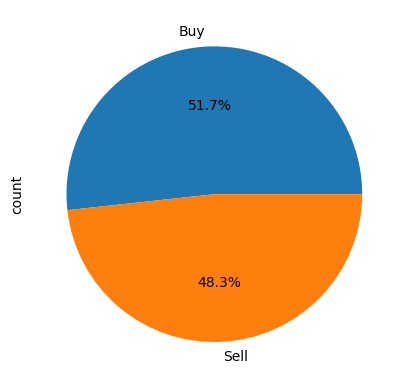

In [10]:
pd.Series(target).value_counts().plot(
    kind="pie", labels=["Buy", "Sell"], autopct="%1.1f%%"
)

In [62]:
wk_df = pd.read_csv("../data/processed/exp_price.csv", parse_dates=True, index_col=0)

In [63]:
ml_df.isna().sum()

QUOTE_DATE           0
EXPIRE_DATE          0
UNDERLYING_LAST      0
STRIKE               0
C_LAST               0
C_BID                0
C_ASK                0
C_IV                 0
C_VOLUME           101
diff                 0
diff_date            0
dtype: int64

## Baseline logistic regression without new data

In [64]:
orig_df = ml_df[
    [
        "UNDERLYING_LAST",
        "STRIKE",
        "C_LAST",
        "C_BID",
        "C_ASK",
        "C_IV",
        "C_VOLUME",
        "diff_date",
    ]
].copy()

In [65]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    orig_df.values, np.array(target), test_size=0.2, random_state=1968
)

In [126]:
pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("scaler", StandardScaler()),
        ("lg", LogisticRegression()),
    ]
)

In [127]:
print(
    f"A random guess would be correct {np.array(target).sum()/len(target):.2%} of times"
)

A random guess would be correct 47.41% of times


In [128]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.5219123505976095

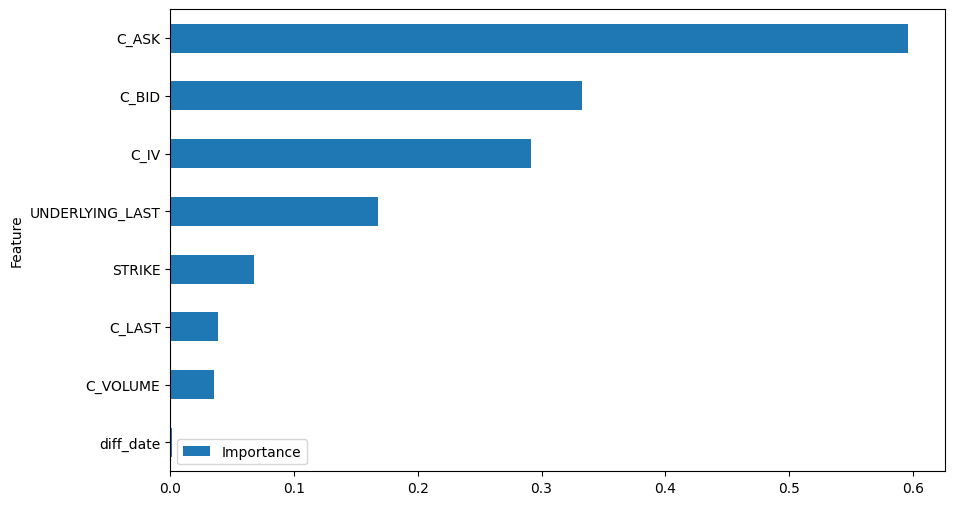

In [129]:
coefficients = pipe.named_steps["lg"].coef_[0]

feature_importance = pd.DataFrame(
    {"Feature": orig_df.columns, "Importance": np.abs(coefficients)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))

## Try Random Forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [155]:
pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("rf", RandomForestClassifier()),
    ]
)

In [156]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.6454183266932271

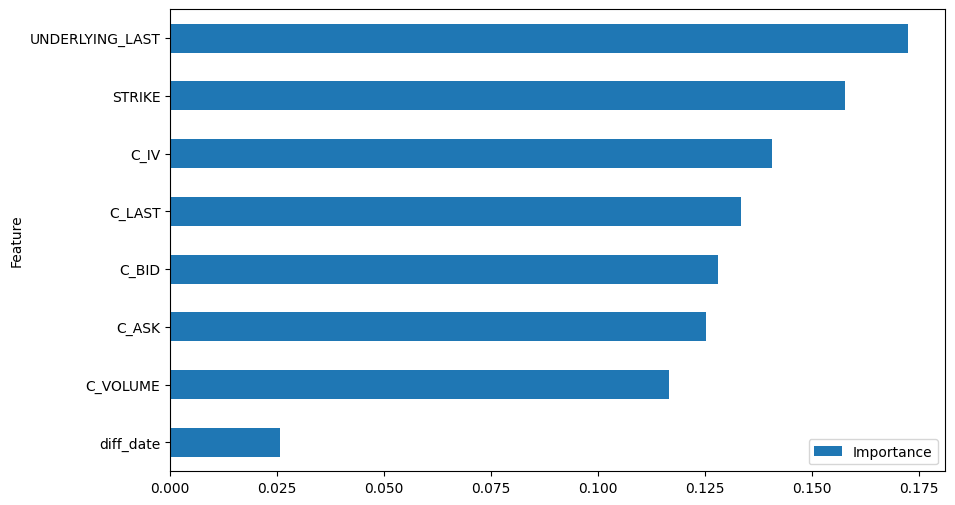

In [157]:
coefficients = pipe.named_steps["rf"].feature_importances_

feature_importance = pd.DataFrame(
    {"Feature": orig_df.columns, "Importance": np.abs(coefficients)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))

## Logistic regression with data from MC simulation

In [134]:
new_df = pd.concat(
    (
        ml_df[
            [
                "UNDERLYING_LAST",
                "STRIKE",
                "C_LAST",
                "C_BID",
                "C_ASK",
                "C_IV",
                "C_VOLUME",
                "diff",
            ]
        ],
        wk_df.drop(["last_quote", "strike"], axis=1),
    ),
    axis=1,
)

In [135]:
new_df.shape

(1253, 21)

In [136]:
new_df.isna().sum()

UNDERLYING_LAST         0
STRIKE                  0
C_LAST                  0
C_BID                   0
C_ASK                   0
C_IV                    0
C_VOLUME              101
diff                    0
exp_price               0
exp_call_price          0
exp_price_min           0
exp_price_max           0
exp_price_std           0
exp_price_median        0
exp_price_q1            0
exp_price_q3            0
exp_price_kurtosis      0
exp_price_skew          0
days                    0
r                       0
prob_itm                0
dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df.values, np.array(target), test_size=0.2, random_state=1968
)

In [138]:
pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("scaler", StandardScaler()),
        ("lg", LogisticRegression()),
    ]
)

In [139]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.5816733067729084

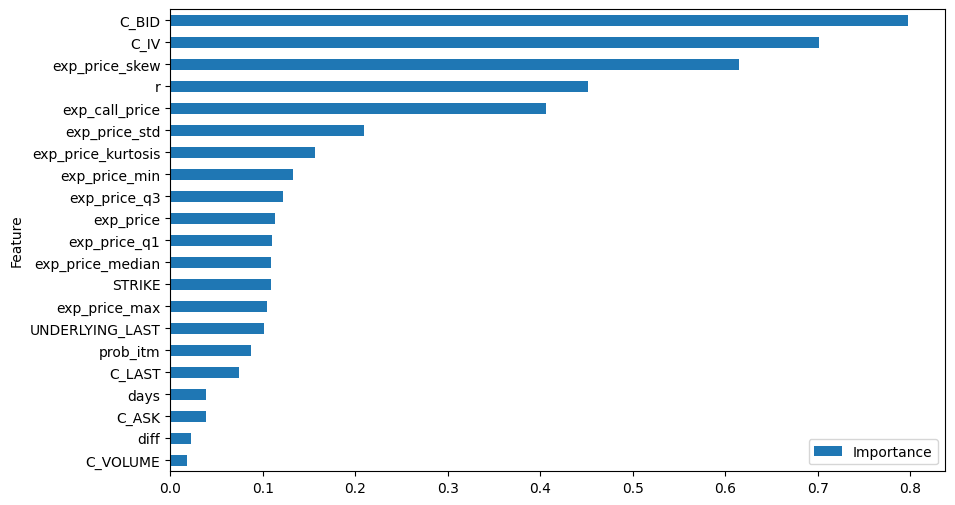

In [140]:
coefficients = pipe.named_steps["lg"].coef_[0]

feature_importance = pd.DataFrame(
    {"Feature": new_df.columns, "Importance": np.abs(coefficients)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))

## Logistic regression with data from MC simulation and some addtional features

In [165]:
new_df = pd.concat(
    (
        ml_df[
            [
                "UNDERLYING_LAST",
                "STRIKE",
                "C_LAST",
                "C_BID",
                "C_ASK",
                "C_IV",
                "C_VOLUME",
                "diff",
            ]
        ],
        wk_df.drop(["last_quote", "strike"], axis=1),
    ),
    axis=1,
)

In [166]:
new_df.shape

(1253, 21)

In [167]:
new_df.isna().sum()

UNDERLYING_LAST         0
STRIKE                  0
C_LAST                  0
C_BID                   0
C_ASK                   0
C_IV                    0
C_VOLUME              101
diff                    0
exp_price               0
exp_call_price          0
exp_price_min           0
exp_price_max           0
exp_price_std           0
exp_price_median        0
exp_price_q1            0
exp_price_q3            0
exp_price_kurtosis      0
exp_price_skew          0
days                    0
r                       0
prob_itm                0
dtype: int64

In [168]:
# Add some features
new_df["iqr"] = new_df["exp_price_q3"] - new_df["exp_price_q1"]
new_df["diff_call"] = new_df["exp_call_price"] - new_df["C_LAST"]
new_df["exp_price_var"] = np.power(new_df["exp_price_std"], 2)
new_df["exp_profit"] = new_df["exp_price"] - (
    new_df["UNDERLYING_LAST"] + new_df["C_LAST"]
)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(
    new_df.values, np.array(target), test_size=0.2, random_state=1968
)

In [170]:
pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("scaler", StandardScaler()),
        ("lg", LogisticRegression()),
    ]
)

In [171]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.5816733067729084

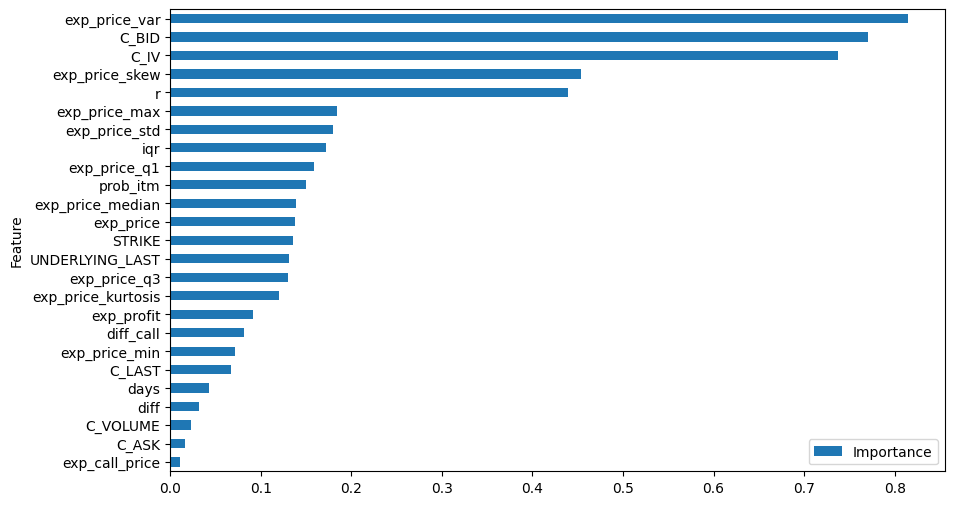

In [172]:
coefficients = pipe.named_steps["lg"].coef_[0]

feature_importance = pd.DataFrame(
    {"Feature": new_df.columns, "Importance": np.abs(coefficients)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))

## Try Random Forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
pipe = Pipeline(
    [
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("rf", RandomForestClassifier()),
    ]
)

In [175]:
pipe.fit(X_train, y_train).score(X_test, y_test)

0.7450199203187251

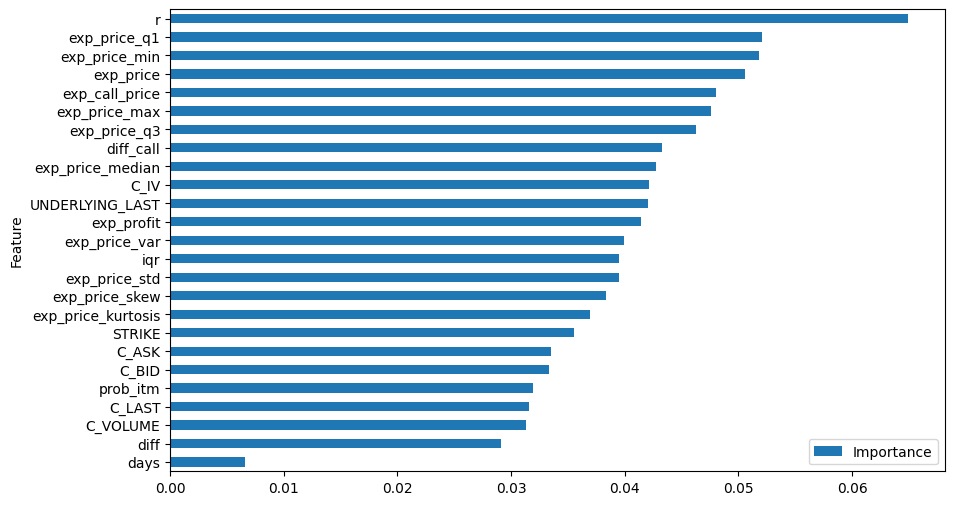

In [176]:
coefficients = pipe.named_steps["rf"].feature_importances_

feature_importance = pd.DataFrame(
    {"Feature": new_df.columns, "Importance": np.abs(coefficients)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=True)
feature_importance.plot(x="Feature", y="Importance", kind="barh", figsize=(10, 6))

In [177]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

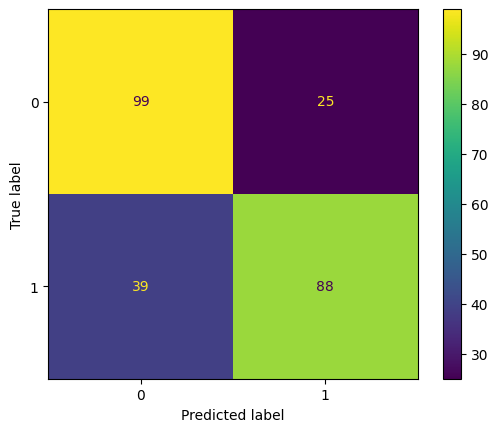

In [178]:
predictions = pipe.predict(X_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [179]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76       124
           1       0.78      0.69      0.73       127

    accuracy                           0.75       251
   macro avg       0.75      0.75      0.74       251
weighted avg       0.75      0.75      0.74       251



The models are not optimized but it looks like that adding our features improves the accuracy significantly